In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
# Load and split the datasets into train and Test set : 

In [5]:
x = pd.read_csv("./traffic_volume_feats.csv")
y= pd.read_csv("./traffic_volume_target.csv")

In [6]:
print(f"Number of Samples in the datasets = {x.shape[0]}. \n Number of features of each sample = {x.shape[1]} ")

Number of Samples in the datasets = 10000. 
 Number of features of each sample = 10 


In [8]:
seed = 1

In [9]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=seed)

In [16]:
#  Define a Keras model with two hidden layers of size 10 to predict the 
# traffic volume. Use these values for the following hyperparameters: 
# activation='relu', loss='mean_squared_error', 
# optimizer='rmsprop', batch_size=50, epochs=200, and 
# shuffle=False.

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop



In [59]:
rate_1 = 0.1
rate_2 = 0.2


In [60]:
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=x_train.shape[1]))
model.add(Dropout(rate_1))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(rate_1))
model.add(Dense(units=1,activation='relu'))
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='mean_squared_error',metrics=['accuracy'])

In [61]:
history = model.fit(x=x_train,y=y_train,epochs=200,batch_size=50,verbose=1,validation_data=(x_test, y_test),shuffle=False)

Epoch 1/200
160/160 [==============================] - 2s 7ms/step - loss: 22322.6738 - accuracy: 0.0041 - val_loss: 20441.3828 - val_accuracy: 0.0060
Epoch 2/200
160/160 [==============================] - 1s 6ms/step - loss: 21035.3398 - accuracy: 0.0045 - val_loss: 18708.1211 - val_accuracy: 0.0060
Epoch 3/200
160/160 [==============================] - 1s 7ms/step - loss: 18549.8418 - accuracy: 0.0045 - val_loss: 15697.8809 - val_accuracy: 0.0060
Epoch 4/200
160/160 [==============================] - 1s 7ms/step - loss: 14825.4434 - accuracy: 0.0045 - val_loss: 11733.7910 - val_accuracy: 0.0060
Epoch 5/200
160/160 [==============================] - 1s 8ms/step - loss: 10630.3271 - accuracy: 0.0045 - val_loss: 7930.2544 - val_accuracy: 0.0060
Epoch 6/200
160/160 [==============================] - 1s 5ms/step - loss: 7325.3330 - accuracy: 0.0045 - val_loss: 5725.5469 - val_accuracy: 0.0060
Epoch 7/200
160/160 [==============================] - 1s 7ms/step - loss: 5803.8584 - accuracy: 

In [63]:
predict = model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 80.8364 - accuracy: 0.0060


In [64]:
print(f"Test Loss = {predict}")

Test Loss = [80.8364028930664, 0.006000000052154064]


In [65]:
# Draw curves of Train lass and Test loss using Maplotlib:

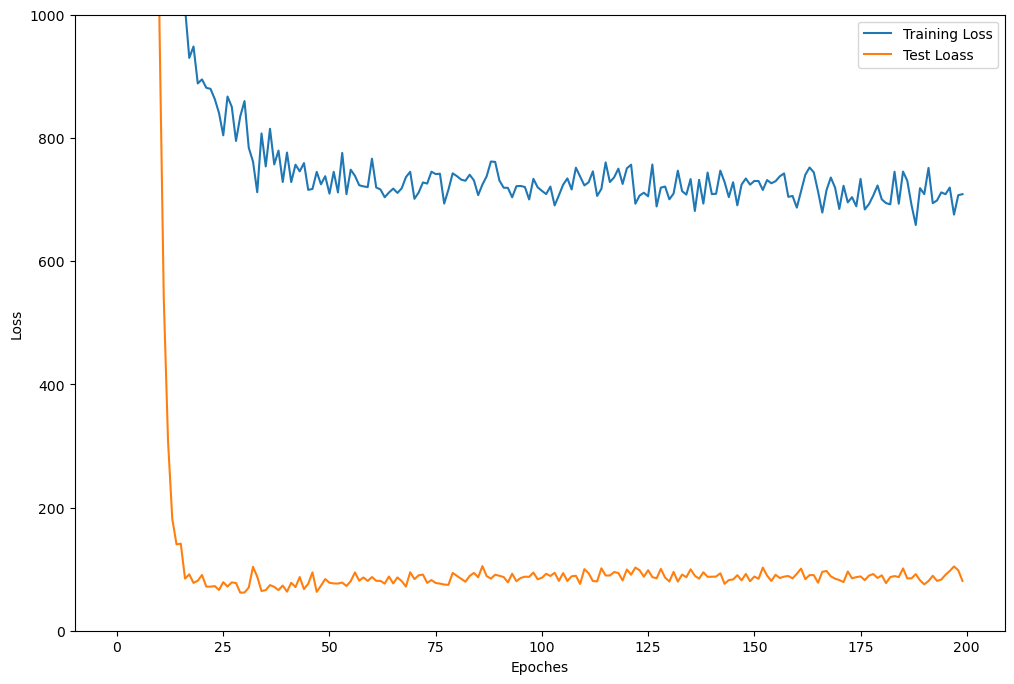

In [66]:
matplotlib.rcParams['figure.figsize'] = (12.0,8.0)
plt.ylim(0,1000)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.legend(['Training Loss',"Test Loass"],loc='upper right')